In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:13pt; font-weight : bold;}
div.input {font-family:Consolas; font-size:13pt;}
</style>
"""))

# 1절. 텐서플로우 v2.x에서 v1 사용하기

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# v1으로 사용하기

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
# tensor = 데이터(상수 or 변수)와의 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()

print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [10]:
# 간단한 수학 연산을 수행하는 그래프
# tensorflow(그래프) 정의
node1 = tf.constant(10, dtype = tf.float32)
node2 = tf.constant(20, dtype = tf.float32)
node3 = tf.multiply(node1, node2)

# 그래프(dataflow) 실행
sess = tf.Session()
print(sess.run([node1, node2, node3]))

sess.close() # 세션을 종료하면 실행 안됌

[10.0, 20.0, 200.0]


## 1.1 Tensorflow
- 그래프 정의
- tf.Session()으로 그래프를 실행
- tf.Session().run()을 통해 값을 확인할 수 있다.

In [11]:
import numpy as np
node1 = tf.constant(np.array([1, 2, 3]), dtype = tf.int16)
node2 = tf.cast(node1, dtype = tf.float32)

sess = tf.Session()
print(sess.run([node2, node1]))

[array([1., 2., 3.], dtype=float32), array([1, 2, 3], dtype=int16)]


In [14]:
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data) # reduce_mean : 평균값을 계산

sess = tf.Session()
print(sess.run(m))

2.5


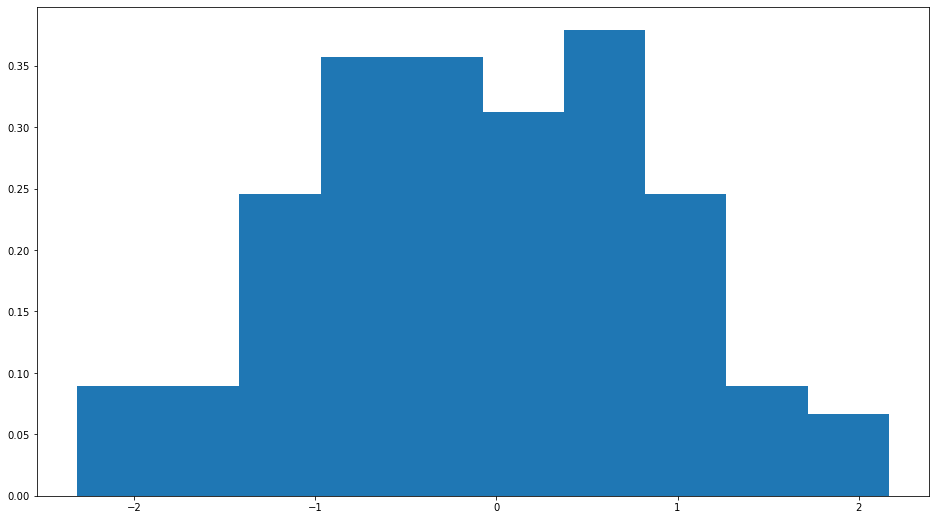

In [17]:
import matplotlib.pyplot as plt
tensor = tf.random_normal([100]) # random_normal([n]) : 평균이 0이고 표준편차가 1인 난수 n개

sess = tf.Session()
plt.figure(figsize=(16, 9))
plt.hist(sess.run(tensor), density=True)
plt.show()

In [16]:
print(sess.run(tensor))

[-1.0060248  -0.8494362   0.12582402  0.02392836  0.09966019  0.34531108
  2.1020906  -1.6774117   0.71676975 -2.2179077  -0.8930714  -0.76224226
  0.28509548  0.38672593 -0.22033471  0.81866324 -1.2979717   0.70301205
 -1.072252    0.7674525  -0.5393061  -0.6748825  -1.1213626   0.6872892
 -0.18835163 -0.5359765  -1.1514037  -0.35852823 -1.2067589  -0.06232808
  1.0620517  -1.026557    1.7229863  -0.0837846  -0.7762997  -0.52146435
  0.7918603   0.67891467 -0.61271054 -0.25714654 -2.0897944   0.8489527
  1.2267942   1.6568959   0.9164015   1.1788082   0.4991103  -0.79172975
  0.61763597  1.3481576   0.8019778   0.14130507  0.38504377  0.01596939
  0.58109885 -0.92298764  0.5403347  -0.05086141  1.383156    0.4600732
  1.821972   -0.7466049  -0.42010862 -0.05353698  0.09034897 -0.04064781
 -0.2251907   1.0361061   1.1729265   0.18645221  0.16155066 -0.82685834
 -0.49961248  1.2488016  -1.3360324   0.05711879  0.6774283  -2.0494506
 -0.64153785  1.2809995   0.2793782   0.01058828  0.542

# 2절. Tensorflow v1을 이용한 Linear Regression을 구현

## 2.1 예측(독립)변수 x가 한개일 때

In [24]:
# tensor graph 정의
# data set (x = 예측변수, y = 결과변수(실제값))
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

# Weight(기울기)와 bias(절편)
# bias(처음에는 랜덤 값 셋팅, 추후 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis (예측치)
H = (W*x) + b

# cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 목적 : cost가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차함수(곡선). 곡선 위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01) # learning_rate : 얼만큼 줄일지
train = optimizer.minimize(cost) # optimizer가 최소가 되도록 cost를 최소화해라

# Session
sess = tf.Session()

# Variable 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())

# # 6000번 학습
# # v2에서는 fit함수
# for step in range(1, 6001):
#     sess.run(train)
#     if step%300 == 0:
#         print('{}번째 학습\ncost : {}\nW값 : {}\nb값 : {}'.format(step, sess.run(cost), sess.run(W), sess.run(b)))
        
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300 == 0:
        print('{}번째 cost : {}\nW : {}\nb : {}'.format(step, cost_val, W_val, b_val))

300번째 cost : 0.014500155113637447
W : [0.86047983]
b : [0.31716207]
600번째 cost : 0.0034214460756629705
W : [0.9322272]
b : [0.1540636]
900번째 cost : 0.0008073213393799961
W : [0.9670789]
b : [0.07483736]
1200번째 cost : 0.0001904949313029647
W : [0.98400843]
b : [0.03635266]
1500번째 cost : 4.49491199105978e-05
W : [0.99223197]
b : [0.01765858]
1800번째 cost : 1.0605911484162789e-05
W : [0.9962267]
b : [0.00857757]
2100번째 cost : 2.50254811362538e-06
W : [0.9981671]
b : [0.0041666]
2400번째 cost : 5.905947091378039e-07
W : [0.9991095]
b : [0.00202411]
2700번째 cost : 1.3947912691492093e-07
W : [0.9995672]
b : [0.00098376]
3000번째 cost : 3.300721473920021e-08
W : [0.9997895]
b : [0.00047852]
3300번째 cost : 7.835746274054145e-09
W : [0.99989724]
b : [0.00023307]
3600번째 cost : 1.8736407980668446e-09
W : [0.99994963]
b : [0.00011397]
3900번째 cost : 4.566572953113024e-10
W : [0.99997514]
b : [5.6132376e-05]
4200번째 cost : 1.0324865962196839e-10
W : [0.9999882]
b : [2.67902e-05]
4500번째 cost : 2.768700720079

In [25]:
sess.run([W, b])

[array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32)]

In [26]:
W_, b_ = sess.run([W, b])

In [27]:
# 최종 회귀식
print('최종적으로 나온 회귀식\nH = ({}*x) + {}'.format(W_[0], b_[0]))

최종적으로 나온 회귀식
H = (0.9999977350234985*x) + 4.490227638598299e-06


In [28]:
# tensor graph 정의
x = np.array([1, 2, 3])
y = [1, 2, 3]

# Weight와 bias
W = tf.Variable(100.0, name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis
H = (W * x) + b

# cost (최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session
sess = tf.Session()

# b노드 초기화
sess.run(tf.global_variables_initializer())

# 4000번 학습
for step in range(1, 4001):
    cost_val, W_val, b_val = sess.run([cost, W, b])
    if step%100 == 1:
        print("{}번째 cost : {}\nW : {}\nb : {}".format(step, cost_val, W_val, b_val))
    
    sess.run(train)

1번째 cost : 45997.59375
W : 100.0
b : [0.6544556]
101번째 cost : 114.50919342041016
W : 13.4290771484375
b : [-28.252445]
201번째 cost : 70.75975799560547
W : 10.769876480102539
b : [-22.209227]
301번째 cost : 43.725215911865234
W : 8.680012702941895
b : [-17.458473]
401번째 cost : 27.01951026916504
W : 7.037188529968262
b : [-13.723948]
501번째 cost : 16.696413040161133
W : 5.745779991149902
b : [-10.788273]
601번째 cost : 10.317375183105469
W : 4.730616092681885
b : [-8.480567]
701번째 cost : 6.375513553619385
W : 3.932605266571045
b : [-6.6665006]
801번째 cost : 3.9396822452545166
W : 3.30529522895813
b : [-5.2404776]
901번째 cost : 2.4344840049743652
W : 2.8121719360351562
b : [-4.119493]
1001번째 cost : 1.5043634176254272
W : 2.424532413482666
b : [-3.238297]
1101번째 cost : 0.9296047687530518
W : 2.11981201171875
b : [-2.545596]
1201번째 cost : 0.5744389295578003
W : 1.8802741765975952
b : [-2.0010698]
1301번째 cost : 0.354968398809433
W : 1.6919755935668945
b : [-1.5730232]
1401번째 cost : 0.219348788261413

## 2.2 예측을 하기 위한 placeholder 이용

In [29]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# ab = tf.add(a, b)
ab = a + b
sess = tf.Session()

# placeholder는 그래프 실행단계에서 값을 설정해야한다.
sess.run(ab, feed_dict = {a:10, b:20})

30.0

In [30]:
sess.run(a, feed_dict = {a:[1, 2, 3]})

array([1., 2., 3.], dtype=float32)

In [31]:
sess.run(ab, feed_dict={a : np.array([10, 20, 30]), 
                        b : np.array([1, 2, 3])})

array([11., 22., 33.], dtype=float32)

In [33]:
# data set (H = 2x + 3)
x_data = np.array([1, 2, 3])
y_data = [5, 7, 9]

# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis
H = (W * x) + b # 여기서 x는 tensor

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], # _만 있는건 필요없는 값
                                         feed_dict = {x : x_data,
                                                      y : y_data}) 
    
    if (step % 200) == 1:
        print('{}번째 cost : {}\nW : {}\nb : {}\n'.format(step, cost_val, W_val, b_val))

1번째 cost : 28.563405990600586
W : [1.452598]
b : [-0.6612966]

201번째 cost : 0.4520893096923828
W : [2.7790456]
b : [1.2290463]

401번째 cost : 0.17263013124465942
W : [2.481403]
b : [1.9056579]

601번째 cost : 0.06591879576444626
W : [2.2974782]
b : [2.3237622]

801번째 cost : 0.02517084777355194
W : [2.1838233]
b : [2.5821269]

1001번째 cost : 0.009611527435481548
W : [2.1135917]
b : [2.741779]

1201번째 cost : 0.0036701911594718695
W : [2.070193]
b : [2.8404346]

1401번째 cost : 0.0014014128828421235
W : [2.0433745]
b : [2.9013996]

1601번째 cost : 0.0005351274739950895
W : [2.0268025]
b : [2.939071]

1801번째 cost : 0.0002043433632934466
W : [2.0165627]
b : [2.962349]

2001번째 cost : 7.802453910699114e-05
W : [2.0102348]
b : [2.9767342]

2201번째 cost : 2.9794297006446868e-05
W : [2.0063245]
b : [2.9856226]

2401번째 cost : 1.1379092029528692e-05
W : [2.0039082]
b : [2.9911156]

2601번째 cost : 4.346763034845935e-06
W : [2.0024157]
b : [2.994509]

2801번째 cost : 1.661839974076429e-06
W : [2.0014942]
b : [2

In [35]:
# 학습된 모델로 부터 예측값 받아보기
sess.run(H, feed_dict = {x : np.array([1, 10, 20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.3 scale이 다른 데이터들의 Linear Regression을 구현

In [ ]:
# ▶ scale이 다르면 cost값이 어느 일정한 값에서 더이상 줄지 않는다.
x_data = [1, 2, 5, 8, 10]
y_data = [5, 15, 68, 80 ,95]

# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis
H = (W * x) + b # 여기서 x는 tensor

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], # _만 있는건 필요없는 값
                                         feed_dict = {x : x_data,
                                                      y : y_data}) 
    
    if (step % 200) == 1:
        print('{}번째 cost : {}\nW : {}\nb : {}\n'.format(step, cost_val, W_val, b_val))